# TikZ-Feynman

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex, Line,PDG
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import feynman_adjust_points
import pyfeyn2
print(pyfeyn2.__version__)

2.0.7.29


## Simple Case

We set the positions of all vertices here.

In [2]:
v1 = Vertex("v1").with_xy(-1, 0)
v2 = Vertex("v2").with_xy(1, 0)

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(name="g",bend=True).connect(v1, v2),
    Leg(name="g",bend=True).with_target(v1).with_xy(-2, 1).with_incoming(),
    Leg(name="g",bend=True).with_target(v1).with_xy(-2, -1).with_incoming().with_class("notred"),
    Leg(name="g",bend=True).with_target(v2).with_xy(2, 1).with_outgoing().with_class("red"),
    Leg("myid1",name="g",bend=True).with_target(v2).with_xy(2, -1).with_outgoing()
)

/tmp/ipykernel_22998/2728759477.py:1: DeprecatedWarning: set_xy is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  v1 = Vertex("v1").with_xy(-1, 0)
/tmp/ipykernel_22998/2728759477.py:2: DeprecatedWarning: set_xy is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  v2 = Vertex("v2").with_xy(1, 0)
/tmp/ipykernel_22998/2728759477.py:7: DeprecatedWarning: set_target is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  Leg(name="g",bend=True).with_target(v1).with_xy(-2, 1).with_incoming(),
/tmp/ipykernel_22998/2728759477.py:7: DeprecatedWarning: set_xy is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  Leg(name="g",bend=True).with_target(v1).with_xy(-2, 1).with_incoming(),
/tmp/ipykernel_22998/2728759477.py:7: DeprecatedWarning: set_incoming is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  Leg(name="g",bend=True).with_target(v1).with_xy(-2, 1).with_incoming(),
/tmp/ipykernel_22998/272

### Style

In [3]:
fd = fd.with_rule("""
* {
    bend-direction: left;
    color: green;
}
""")

In [4]:
fd.add_rules("""
.red {
    color: red;
}
.notred {
    color: blue;
}
#myid1 {
    color: gray;
}
.pdgid21 {
    color: black;
}
""")

FeynmanDiagram(default_style=True, propagators=[Propagator(id='Propagator7', id2=None, pdgid=<PDGID: 21>, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, bend=True, label=None, momentum=None, tension=None, length=None, source='v1', target='v2')], vertices=[Vertex(id='v1', id2=None, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=-1.0, y=0.0, z=None, label=None), Vertex(id='v2', id2=None, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=1.0, y=0.0, z=None, label=None)], legs=[Leg(id='Leg8', id2=None, pdgid=<PDGID: 21>, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, bend=True, label=None, momentum=None, tension=None, length=None, target='v1', x=-2.0, y=1.0, z=None, sense='incoming', external=None), Leg(id='Leg9', id2=None, pdgid=<PDGID: 21>, name='g', type='gluon', 

In [5]:
tfd = TikzFeynmanRender(fd)
print(tfd.get_src())

\documentclass[preview,crop,tikz]{standalone}%
\usepackage[T1]{fontenc}%
\usepackage[utf8]{inputenc}%
\usepackage{lmodern}%
\usepackage{textcomp}%
\usepackage{lastpage}%
%
\RequirePackage{luatex85}%
\usepackage[compat=1.1.0]{tikz-feynman}%
%
\begin{document}%
\normalsize%
\begin{tikzpicture}
\begin{feynman}
	\vertex (v1) [] at (-1.0,0.0);
	\vertex (v1clone) [] at (-1.0,0.0);
	\vertex (v2) [] at (1.0,0.0);
	\vertex (v2clone) [] at (1.0,0.0);
	\vertex (Leg8) [] at (-2.0,1.0);
	\vertex (Leg9) [] at (-2.0,-1.0);
	\vertex (Leg10) [] at (2.0,1.0);
	\vertex (myid1) [] at (2.0,-1.0);
	\diagram*{
		(v1) -- [gluon,black,bend left] (v2),
		(Leg8) -- [gluon,black,bend left] (v1),
		(Leg9) -- [gluon,blue,bend left] (v1),
		(v2) -- [gluon,red,bend left] (Leg10),
		(v2) -- [gluon,gray,bend left] (myid1),
	};
\end{feynman}
\end{tikzpicture}
%
\end{document}


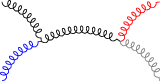

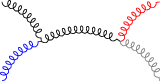

In [6]:
tfd.render("test.pdf")

## Complicated Case

We only set the positions of the Legs here.

In [16]:
fd = FeynmanDiagram().with_rules("* {color: red;} \n.fermion {color: blue;}")
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
p3 = Propagator("p3").connect(v3, v2).with_type("gluon")
p4 = Propagator("p4").connect(v4, v3).with_type("gluon")
p5 = Propagator("p5").connect(v4, v2).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, 1)
l2 = Leg("l2").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, -1)
l3 = Leg("l3").with_target(v2).with_type("fermion").with_outgoing().with_xy(2, -2)
l4 = Leg("l4").with_target(v3).with_type("fermion").with_outgoing().with_xy(2, 2)
l5 = Leg("l5").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, 1)
l6 = Leg("l6").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, -1)

l6.style.color = "black"

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])

/tmp/ipykernel_22998/900790511.py:6: DeprecatedWarning: set_type is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
/tmp/ipykernel_22998/900790511.py:7: DeprecatedWarning: set_type is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
/tmp/ipykernel_22998/900790511.py:8: DeprecatedWarning: set_type is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  p3 = Propagator("p3").connect(v3, v2).with_type("gluon")
/tmp/ipykernel_22998/900790511.py:9: DeprecatedWarning: set_type is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  p4 = Propagator("p4").connect(v4, v3).with_type("gluon")
/tmp/ipykernel_22998/900790511.py:10: DeprecatedWarning: set_type is deprecated as of 2.0.7.1 and will be removed in 2.2. Use with...().
  p5 = Propagator("p5").connect(v4, v2).with_type("gluon")
/tmp/ipykernel_22998/900

Now calculate the positions of vertices.

In [17]:
ffd= feynman_adjust_points(fd)

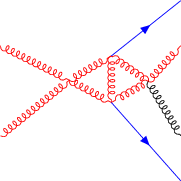

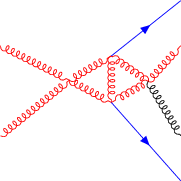

In [18]:
TikzFeynmanRender(ffd).render()